## importing neccessary liberaries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
import logging

### Load Data

In [2]:
df = pd.read_csv("database SFRC.csv")

### EDA- Exploratory data analysis

In [3]:
# independent and target variables
X = df.drop('Vu (KN)', axis = 1)
y = df['Vu (KN)']

In [5]:
#Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_norm = scaler.fit_transform (X)
X_norm

array([[-0.08232928,  0.03050947, -0.83064519, ..., -0.14488495,
         0.97627937, -0.25343822],
       [-0.08232928,  0.03050947, -0.9419731 , ..., -0.14488495,
         0.97627937, -0.25343822],
       [-0.08232928,  0.03050947, -0.83859718, ...,  0.30745235,
         0.97627937,  0.20182885],
       ...,
       [ 0.01120566, -0.43239725, -0.67955731, ..., -1.29312579,
        -0.51769709, -1.25502576],
       [ 0.01120566, -0.43239725, -0.67955731, ..., -1.08435473,
        -0.51769709, -0.89081211],
       [ 0.01120566, -0.43239725, -0.67955731, ..., -0.87558367,
        -0.51769709, -0.52659846]])

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 64)

In [7]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [8]:
ADB1 = AdaBoostRegressor(random_state=0)
ADB1.fit(X_train, y_train)

AdaBoostRegressor(random_state=0)

In [9]:
ADB1.get_params()

{'estimator': None,
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 50,
 'random_state': 0}

In [10]:
ADB1.feature_importances_

array([0.48924734, 0.28897042, 0.06077892, 0.06480563, 0.06601508,
       0.01679785, 0.00469116, 0.00869359])

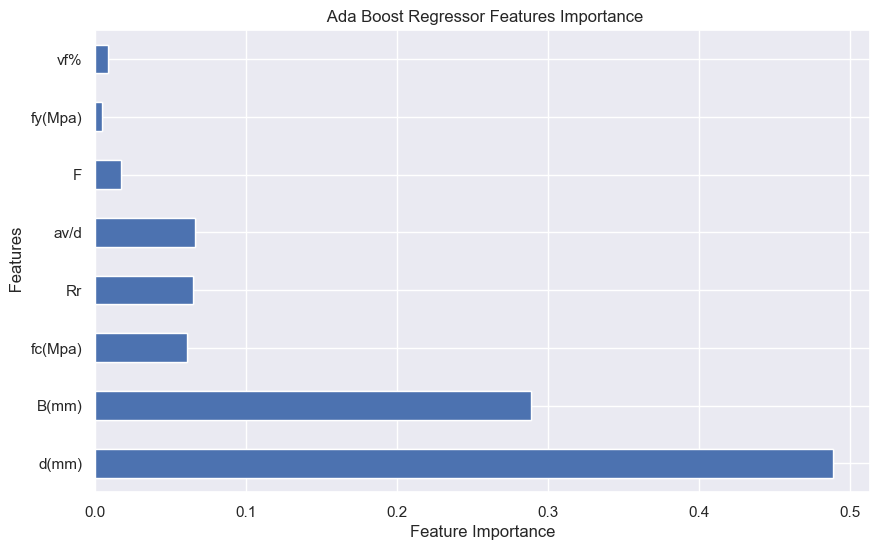

In [12]:
importances = pd.Series(ADB1.feature_importances_ , index=X.columns)
importances.plot(kind = 'barh', figsize=(10,6))
plt.xlabel("Feature Importance")
plt.ylabel(" Features")
plt.title(" Ada Boost Regressor Features Importance")
plt.show()

In [13]:
from math import sqrt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,ADB1.predict(X_test))))
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,ADB1.predict(X_train))))
print('The MSE  on the testing dataset is: ',(mean_squared_error(y_test,ADB1.predict(X_test))))
print('The MSE  on the training dataset is: ',(mean_squared_error(y_train,ADB1.predict(X_train))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,ADB1.predict(X_test)))
print('The MAE  on the training daset is: ',mean_absolute_error(y_train,ADB1.predict(X_train)))
print('The r2_score on the testing dataset is: ',r2_score(y_test,ADB1.predict(X_test)))
print('The r2_score on the training dataset is: ',r2_score(y_train,ADB1.predict(X_train)))

The RMSE  on the testing dataset is:  62.087662068264926
The RMSE  on the training dataset is:  54.82389227321293
The MSE  on the testing dataset is:  3854.877781103063
The MSE  on the training dataset is:  3005.659163984856
The MAE  on the testing dataset is:  54.707392494404154
The MAE  on the training daset is:  48.07926384485508
The r2_score on the testing dataset is:  0.8429466791359763
The r2_score on the training dataset is:  0.8627539017105781


### Hyperparameter Tunning (Optimization)]

In [20]:
ADB_TEST = ADB1.predict(X_test)

In [21]:
ADB_TRAIN = ADB1.predict(X_train)

In [37]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

# Define a stronger base estimator
base_model = DecisionTreeRegressor(max_depth=4)  

# Initialize AdaBoost with the new base model
optimized_ada = AdaBoostRegressor(estimator=base_model, 
                                  n_estimators=best_params['n_estimators'], 
                                  learning_rate=best_params['learning_rate'], 
                                  loss=best_params['loss'], 
                                  random_state=42)

optimized_ada.fit(X_train, y_train)


AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4),
                  learning_rate=0.05, loss='exponential', n_estimators=500,
                  random_state=42)

In [38]:
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,optimized_ada.predict(X_test))))
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,optimized_ada.predict(X_train))))
print('The MSE  on the testing dataset is: ',(mean_squared_error(y_test,optimized_ada.predict(X_test))))
print('The MSE  on the training dataset is: ',(mean_squared_error(y_train,optimized_ada.predict(X_train))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,optimized_ada.predict(X_test)))
print('The MAE  on the training daset is: ',mean_absolute_error(y_train,optimized_ada.predict(X_train)))
print('The r2_score on the testing dataset is: ',r2_score(y_test,optimized_ada.predict(X_test)))
print('The r2_score on the training dataset is: ',r2_score(y_train,optimized_ada.predict(X_train)))

The RMSE  on the testing dataset is:  43.099378342807796
The RMSE  on the training dataset is:  33.80636649442249
The MSE  on the testing dataset is:  1857.5564135364898
The MSE  on the training dataset is:  1142.8704155552118
The MAE  on the testing dataset is:  34.3494780544
The MAE  on the training daset is:  27.738494681195263
The r2_score on the testing dataset is:  0.9243204532013225
The r2_score on the training dataset is:  0.9478136086536812


### Actual vs Predicted Capacity

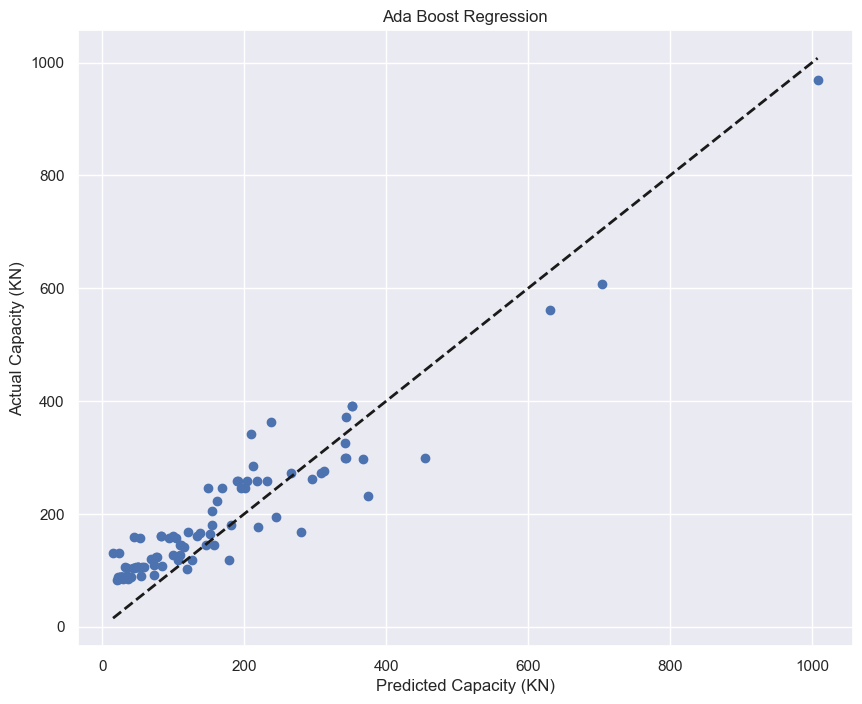

In [39]:
plt.figure(figsize=(10,8))
plt.title('Ada Boost Regression')
plt.xlabel("Predicted Capacity (KN)")
plt.ylabel("Actual Capacity (KN)")
plt.scatter(y_test,ADB_TEST)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()